In [139]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 24.5 MB/s eta 0:00:00m eta 0:00:010:00:01


In [1]:
from typing import Dict, Tuple
from tqdm import tqdm
import torch
import torch.nn as nn

import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import models, transforms
from torchvision.utils import save_image, make_grid
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import numpy as np
from IPython.display import HTML
import rasterio
from rasterio.plot import show
from PIL import Image
import os
import skimage as ski
from skimage import io
io.use_plugin('pil')
from skimage.metrics import structural_similarity as ssim
import cv2

In [2]:
def normalize_images(images):
    mean = np.mean(images)
    std = np.std(images)
    min_value = np.min(images)
    max_value = np.max(images)
    normalized_images = (images - min_value) / (max_value - min_value)
    #normalized_images = (images-mean)/std
    return normalized_images
    #return 2*normalized_images-1


In [3]:
dataset = []

folder_path = "//home//rounak//Desktop//KN//"
image_files = [file for file in os.listdir(folder_path) if file.endswith(('.tiff'))]
k=0
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    if(k%100==0):
        print(k)
    k+=1
    img_push = np.zeros((323,323,3))
    img = io.imread(image_path, plugin='pil')
    img = np.array(img)
    img_push[:,:,0] = normalize_images(img[:,:,0])
    img_push[:,:,1] = normalize_images(img[:,:,2])
    img_push[:,:,2] = 0.5*normalize_images(img[:,:,0])+0.5*normalize_images(img[:,:,2])
    img_push = np.array(img_push)
    image_array = img_push.T
    tensor = torch.from_numpy(image_array)
    tensor = normalize_images(np.array(tensor))
    tensor = 2*tensor - 1
    '''mean_1, std_1 = tensor[0,:,:].mean(), tensor[0,:,:].std()
    mean_2, std_2 = tensor[1,:,:].mean(), tensor[1,:,:].std()
    mean_3, std_3 = tensor[2,:,:].mean(), tensor[2,:,:].std()
    norm = transforms.Normalize((mean_1, mean_2, mean_3), (std_1, std_2, std_3))
    tensor = norm(tensor)'''
    #image_array = torch.from_numpy(np.array(image_array))
    #norm = transforms.Normalize((0,0,0), (1,1,1), inplace = True)
    #image_array = norm(torch.tensor(image_array))
    dataset.append((tensor,0))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000


In [4]:
dataset[0][0].T.shape

(323, 323, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


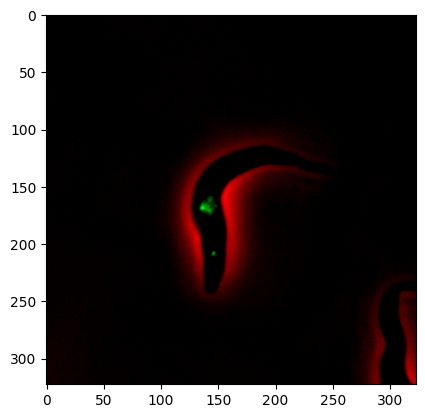

In [22]:
plt.imshow(dataset[0][0].T, cmap="gray")

In [23]:
np.max(np.array(dataset[0][0]))

1.0

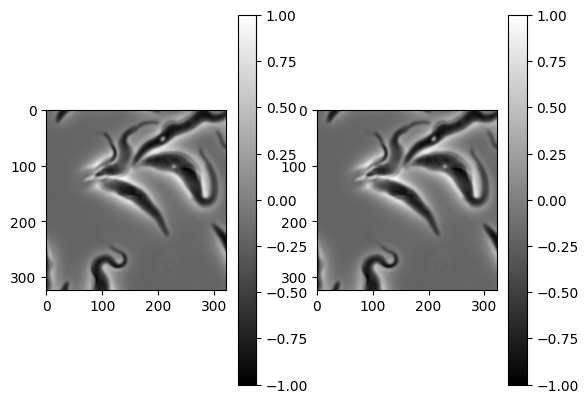

In [24]:
i=1
img = (np.array(dataset[i][0]))
img1 = img*2 -1
img2 = (img1+1)/2

plt.subplot(1,2,1)
plt.imshow(img[0,:,:], cmap="gray")
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(img2[0,:,:], cmap="gray")
plt.colorbar()

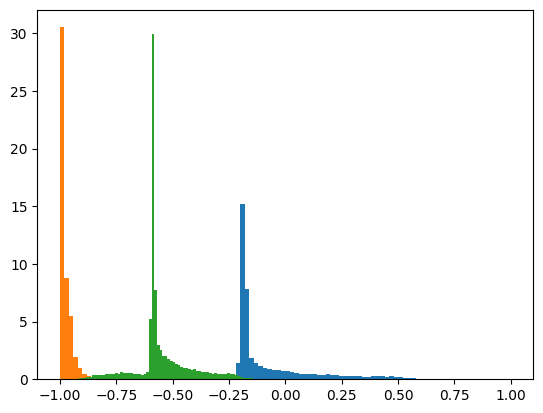

In [5]:
i=5
img = (np.array(dataset[i][0][0,:,:]))
img1 = (np.array(dataset[i][0][1,:,:]))
img2 = (np.array(dataset[i][0][2,:,:]))
plt.hist(img.reshape(-1,), bins=100, density=True)
plt.hist(img1.reshape(-1,), bins=100, density=True)
plt.hist(img2.reshape(-1,), bins=100, density=True)
plt.show()

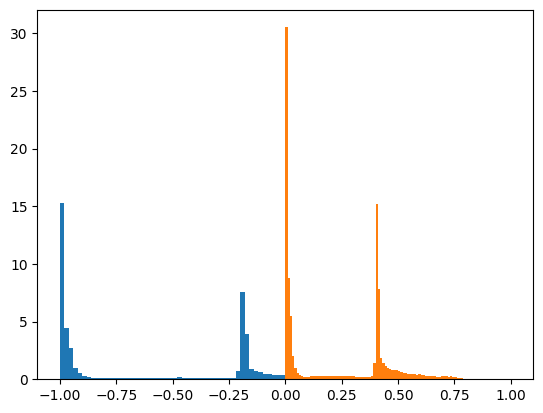

In [10]:
i=5
img = (np.array(dataset[i][0]))
img1 = (np.array(dataset[i][0])+1)/2
plt.hist(img.reshape(-1,), bins=100, density=True)
plt.hist(img1.reshape(-1,), bins=100, density=True)
plt.show()

In [286]:
plt.hist(np.array(dataset[0][0][2,:,:].reshape((-1,))), bins=100)

TypeError: tuple indices must be integers or slices, not tuple

In [4]:
def subsample(img, k):
    lst = []
    for i in range(0,img.shape[0]):
        x = img[i][::k, ::k]
        lst.append(x.T)
    return np.array(lst)

In [5]:

def normalize_gray_images(images):
    mean = images.mean()
    std = images.std()
    normalized_images = (images - mean) / std

    return normalized_images


In [6]:
dataset_compressed = []

for i in range(5067):
    dataset_compressed.append(np.float32(np.array(dataset[i][0].T)))

dataset_compressed = np.array(dataset_compressed)

dataset_compressed = subsample(dataset_compressed, 4)

dataset_compressed = np.array(dataset_compressed)
dataset_compressed.shape

(5067, 3, 81, 81)

In [7]:
dataset_compressed = normalize_gray_images(np.float32(np.array(dataset_compressed)))
dataset_compressed.shape

(5067, 3, 81, 81)

In [8]:
dataset_final = []
for i in range(5067):
    img_arr = dataset_compressed[i]
    img_arr = img_arr[:, :80, :80]
    dataset_final.append((torch.from_numpy(img_arr),0))


In [9]:
dataset_final[0][0].shape

torch.Size([3, 80, 80])

/tmp/ipykernel_2111035/2166379836.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  plt.imshow(dataset_final[1][0].T)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


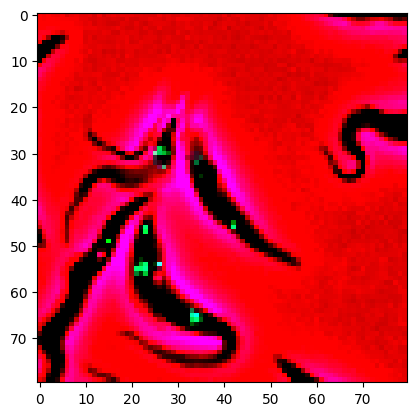

In [10]:
plt.imshow(dataset_final[1][0].T)

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os

class Conv3(nn.Module):
    def __init__(
        self, in_channels: int, out_channels: int, is_res: bool = False
    ) -> None:
        super().__init__()
        self.main = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, 1, 1),
            nn.GroupNorm(8, out_channels),
            nn.ReLU(),
        )
        self.conv = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, 3, 1, 1),
            nn.GroupNorm(8, out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, 3, 1, 1),
            nn.GroupNorm(8, out_channels),
            nn.ReLU(),
        )

        self.is_res = is_res

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.main(x)
        if self.is_res:
            x = x + self.conv(x)
            return x / 1.414
        else:
            return self.conv(x)


class UnetDown(nn.Module):
    def __init__(self, in_channels: int, out_channels: int) -> None:
        super(UnetDown, self).__init__()
        layers = [Conv3(in_channels, out_channels), nn.MaxPool2d(2)]
        self.model = nn.Sequential(*layers)

    def forward(self, x: torch.Tensor) -> torch.Tensor:

        return self.model(x)


class UnetUp(nn.Module):
    def __init__(self, in_channels: int, out_channels: int) -> None:
        super(UnetUp, self).__init__()
        layers = [
            nn.ConvTranspose2d(in_channels, out_channels, 2, 2),
            Conv3(out_channels, out_channels),
            Conv3(out_channels, out_channels),
        ]
        self.model = nn.Sequential(*layers)

    def forward(self, x: torch.Tensor, skip: torch.Tensor) -> torch.Tensor:
        x = torch.cat((x, skip), 1)
        x = self.model(x)

        return x


class TimeSiren(nn.Module):
    def __init__(self, emb_dim: int) -> None:
        super(TimeSiren, self).__init__()

        self.lin1 = nn.Linear(1, emb_dim, bias=False)
        self.lin2 = nn.Linear(emb_dim, emb_dim)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x.view(-1, 1)
        x = torch.sin(self.lin1(x))
        x = self.lin2(x)
        return x


class NaiveUnet(nn.Module):
    def __init__(self, in_channels: int, out_channels: int, n_feat: int = 128) -> None:
        super(NaiveUnet, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels

        self.n_feat = n_feat

        self.init_conv = Conv3(in_channels, n_feat, is_res=True)

        self.down1 = UnetDown(n_feat, n_feat)
        self.down2 = UnetDown(n_feat, 2 * n_feat)
        self.down3 = UnetDown(2 * n_feat, 2 * n_feat)

        self.to_vec = nn.Sequential(nn.AvgPool2d(2), nn.ReLU())  #changed to 2

        self.timeembed = TimeSiren(2 * n_feat)

        self.up0 = nn.Sequential(
            nn.ConvTranspose2d(2 * n_feat, 2 * n_feat, 2, 2),
            nn.GroupNorm(8, 2 * n_feat),
            nn.ReLU(),
        )

        self.up1 = UnetUp(4 * n_feat, 2 * n_feat)
        self.up2 = UnetUp(4 * n_feat, n_feat)
        self.up3 = UnetUp(2 * n_feat, n_feat)
        self.out = nn.Conv2d(2 * n_feat, self.out_channels, 3, 1, 1)

    def forward(self, x: torch.Tensor, t: torch.Tensor) -> torch.Tensor:

        x = self.init_conv(x)

        down1 = self.down1(x)
        down2 = self.down2(down1)
        down3 = self.down3(down2)

        thro = self.to_vec(down3)
        temb = self.timeembed(t).view(-1, self.n_feat * 2, 1, 1)

        thro = self.up0(thro + temb)

        up1 = self.up1(thro, down3) + temb
        up2 = self.up2(up1, down2)
        up3 = self.up3(up2, down1)

        out = self.out(torch.cat((up3, x), 1))

        return out

In [12]:
from typing import Dict, Tuple


import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


class DDPM(nn.Module):
    def __init__(self,eps_model: nn.Module,betas: Tuple[float, float],n_T: int,criterion: nn.Module = nn.MSELoss(),) -> None:
        super(DDPM, self).__init__()
        self.eps_model = eps_model

        for k, v in ddpm_schedules(betas[0], betas[1], n_T).items():
            self.register_buffer(k, v)

        self.n_T = n_T
        self.criterion = criterion

    def forward(self, x):
        _ts = torch.randint(1, self.n_T + 1, (x.shape[0],)).to(x.device)

        eps = torch.randn_like(x)

        x_t = (
            self.sqrtab[_ts, None, None, None] * x
            + self.sqrtmab[_ts, None, None, None] * eps
        )

        return self.criterion(eps, self.eps_model(x_t, _ts / self.n_T))

    def sample(self, n_sample: int, size, device) -> torch.Tensor:

        x_i = torch.randn(n_sample, *size).to(device)


        for i in range(self.n_T, 0, -1):
            z = torch.randn(n_sample, *size).to(device) if i > 1 else 0
            eps = self.eps_model(
                x_i, torch.tensor(i / self.n_T).to(device).repeat(n_sample, 1)
            )
            x_i = (
                self.oneover_sqrta[i] * (x_i - eps * self.mab_over_sqrtmab[i])
                + self.sqrt_beta_t[i] * z
            )

        return x_i


def ddpm_schedules(beta1: float, beta2: float, T: int) -> Dict[str, torch.Tensor]:
    """
    Returns pre-computed schedules for DDPM sampling, training process.
    """
    assert beta1 < beta2 < 1.0, "beta1 and beta2 must be in (0, 1)"

    beta_t = (beta2 - beta1) * torch.arange(0, T + 1, dtype=torch.float32) / T + beta1
    sqrt_beta_t = torch.sqrt(beta_t)
    alpha_t = 1 - beta_t
    log_alpha_t = torch.log(alpha_t)
    alphabar_t = torch.cumsum(log_alpha_t, dim=0).exp()

    sqrtab = torch.sqrt(alphabar_t)
    oneover_sqrta = 1 / torch.sqrt(alpha_t)

    sqrtmab = torch.sqrt(1 - alphabar_t)
    mab_over_sqrtmab_inv = (1 - alpha_t) / sqrtmab

    return {
        "alpha_t": alpha_t,  # \alpha_t
        "oneover_sqrta": oneover_sqrta,  # 1/\sqrt{\alpha_t}
        "sqrt_beta_t": sqrt_beta_t,  # \sqrt{\beta_t}
        "alphabar_t": alphabar_t,  # \bar{\alpha_t}
        "sqrtab": sqrtab,  # \sqrt{\bar{\alpha_t}}
        "sqrtmab": sqrtmab,  # \sqrt{1-\bar{\alpha_t}}
        "mab_over_sqrtmab": mab_over_sqrtmab_inv,  # (1-\alpha_t)/\sqrt{1-\bar{\alpha_t}}
    }

In [22]:
def photo_changer(image):
    image_final = np.zeros((80,80,3))
    image_final[:,:,0] = image[:,:,0]
    image_final[:,:,1] = image[:,:,1]
    image_final[:,:,2] = image[:,:,0]
    return image_final

In [10]:
checkpoint = torch.load(f"./weight_cifar/ddpm_cifar_best.pth")
epoch = checkpoint['epoch']
optim.load_state_dict(checkpoint['optimizer_state_dict'])
nn_model.load_state_dict(checkpoint['model_state_dict'])

NameError: name 'optim' is not defined

In [13]:
from typing import Dict, Optional, Tuple
from sympy import Ci
from tqdm import tqdm

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from torchvision.datasets import CIFAR10
from torchvision import transforms
from torchvision.utils import save_image, make_grid



def train_cifar10(
    n_epoch: int = 10000, device: str = "cuda:1", load_pth: Optional[str] = None
) -> None:

    ddpm = DDPM(eps_model=NaiveUnet(3, 3, n_feat=128), betas=(1e-4, 0.02), n_T=1000)

    if load_pth is not None:
        ddpm.load_state_dict(torch.load("ddpm_cifar.pth"))

    ddpm.to(device)

    tf = transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
    )

    

    dataloader = DataLoader(dataset_final, batch_size=128, shuffle=True)
    optim = torch.optim.Adam(ddpm.parameters(), lr=1e-5)
    
    lmin = 1e10
    
    for i in range(n_epoch):
        print(f"Epoch {i} : ")
        ddpm.train()

        pbar = tqdm(dataloader)
        loss_ema = None
        for x, _ in pbar:
            optim.zero_grad()
            x = x.to(device)
            loss = ddpm(x)
            
            loss.backward()
            if loss_ema is None:
                loss_ema = loss.item()
            else:
                loss_ema = 0.9 * loss_ema + 0.1 * loss.item()
            pbar.set_description(f"loss: {loss_ema:.4f}")
            optim.step()
        
        if loss.item() < lmin:
            lmin = loss.item()
            ddpm.eval()
            torch.save({
                'epoch': i,
                'model_state_dict': ddpm.state_dict(),
                'optimizer_state_dict': optim.state_dict(),
                }, str(f"./weight_cifar/ddpm_tryptag_best_colored_funny.pth"))
            print("Saved model at " + str(f"./weight_cifar/ddpm_tryptag_best_colored_funny.pth"))
            
        
        if i % 20 == 0:
            ddpm.eval()
            with torch.no_grad():
                xh = ddpm.sample(8, (3, 80, 80), device)
                xset = torch.cat([xh, x[:8]], dim=0)
                grid = make_grid(xset, normalize=True, value_range=(-1, 1), nrow=4)
                save_image(grid, f"./weight_cifar/ddpm_sample_tryptag_colored_funny{i}.png")

                # save model
                torch.save(ddpm.state_dict(), f"./weight_cifar/ddpm_tryptag_colored_funny.pth")


if __name__ == "__main__":
    train_cifar10(n_epoch=10000)

Epoch 0 : 


loss: 0.8737: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:26<00:00,  1.53it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 1 : 


loss: 0.6549: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.59it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 2 : 


loss: 0.4645: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.59it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 3 : 


loss: 0.3331: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 4 : 


loss: 0.2494: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 5 : 


loss: 0.2038: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 6 : 


loss: 0.1738: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 7 : 


loss: 0.1430: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 8 : 


loss: 0.1366: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 9 : 


loss: 0.1220: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 10 : 


loss: 0.1110: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 11 : 


loss: 0.1100: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 12 : 


loss: 0.1019: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 13 : 


loss: 0.0947: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 14 : 


loss: 0.0957: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 15 : 


loss: 0.0926: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 16 : 


loss: 0.0865: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 17 : 


loss: 0.0840: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 18 : 


loss: 0.0866: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 19 : 


loss: 0.0843: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 20 : 


loss: 0.0808: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 21 : 


loss: 0.0805: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 22 : 


loss: 0.0746: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 23 : 


loss: 0.0749: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 24 : 


loss: 0.0714: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 25 : 


loss: 0.0748: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 26 : 


loss: 0.0714: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 27 : 


loss: 0.0660: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 28 : 


loss: 0.0652: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 29 : 


loss: 0.0667: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 30 : 


loss: 0.0648: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 31 : 


loss: 0.0638: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 32 : 


loss: 0.0651: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 33 : 


loss: 0.0603: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 34 : 


loss: 0.0647: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 35 : 


loss: 0.0608: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 36 : 


loss: 0.0561: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 37 : 


loss: 0.0586: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 38 : 


loss: 0.0571: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 39 : 


loss: 0.0596: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 40 : 


loss: 0.0567: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 41 : 


loss: 0.0532: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 42 : 


loss: 0.0542: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 43 : 


loss: 0.0517: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 44 : 


loss: 0.0561: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 45 : 


loss: 0.0513: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 46 : 


loss: 0.0540: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 47 : 


loss: 0.0488: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 48 : 


loss: 0.0508: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 49 : 


loss: 0.0539: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 50 : 


loss: 0.0518: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 51 : 


loss: 0.0486: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 52 : 


loss: 0.0529: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 53 : 


loss: 0.0492: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 54 : 


loss: 0.0484: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 55 : 


loss: 0.0464: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 56 : 


loss: 0.0498: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 57 : 


loss: 0.0462: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 58 : 


loss: 0.0469: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 59 : 


loss: 0.0482: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 60 : 


loss: 0.0467: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 61 : 


loss: 0.0441: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 62 : 


loss: 0.0474: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 63 : 


loss: 0.0446: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 64 : 


loss: 0.0437: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 65 : 


loss: 0.0430: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 66 : 


loss: 0.0427: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 67 : 


loss: 0.0407: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 68 : 


loss: 0.0462: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 69 : 


loss: 0.0449: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 70 : 


loss: 0.0441: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 71 : 


loss: 0.0416: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 72 : 


loss: 0.0406: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 73 : 


loss: 0.0428: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 74 : 


loss: 0.0415: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 75 : 


loss: 0.0406: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 76 : 


loss: 0.0407: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 77 : 


loss: 0.0413: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 78 : 


loss: 0.0404: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 79 : 


loss: 0.0400: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 80 : 


loss: 0.0389: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 81 : 


loss: 0.0400: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 82 : 


loss: 0.0428: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 83 : 


loss: 0.0390: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 84 : 


loss: 0.0411: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 85 : 


loss: 0.0385: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 86 : 


loss: 0.0399: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 87 : 


loss: 0.0397: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 88 : 


loss: 0.0378: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 89 : 


loss: 0.0384: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 90 : 


loss: 0.0378: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 91 : 


loss: 0.0383: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 92 : 


loss: 0.0361: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 93 : 


loss: 0.0368: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 94 : 


loss: 0.0366: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 95 : 


loss: 0.0364: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 96 : 


loss: 0.0368: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 97 : 


loss: 0.0368: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 98 : 


loss: 0.0355: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 99 : 


loss: 0.0363: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 100 : 


loss: 0.0357: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 101 : 


loss: 0.0373: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 102 : 


loss: 0.0349: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 103 : 


loss: 0.0365: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 104 : 


loss: 0.0377: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 105 : 


loss: 0.0373: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 106 : 


loss: 0.0354: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 107 : 


loss: 0.0368: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 108 : 


loss: 0.0325: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 109 : 


loss: 0.0353: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 110 : 


loss: 0.0349: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 111 : 


loss: 0.0356: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 112 : 


loss: 0.0330: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 113 : 


loss: 0.0322: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 114 : 


loss: 0.0354: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 115 : 


loss: 0.0311: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 116 : 


loss: 0.0318: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 117 : 


loss: 0.0331: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 118 : 


loss: 0.0305: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 119 : 


loss: 0.0351: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 120 : 


loss: 0.0322: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 121 : 


loss: 0.0348: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 122 : 


loss: 0.0354: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 123 : 


loss: 0.0349: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 124 : 


loss: 0.0334: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 125 : 


loss: 0.0351: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 126 : 


loss: 0.0328: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 127 : 


loss: 0.0332: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 128 : 


loss: 0.0307: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 129 : 


loss: 0.0348: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 130 : 


loss: 0.0305: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 131 : 


loss: 0.0307: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 132 : 


loss: 0.0287: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 133 : 


loss: 0.0335: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 134 : 


loss: 0.0323: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 135 : 


loss: 0.0316: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 136 : 


loss: 0.0314: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 137 : 


loss: 0.0313: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 138 : 


loss: 0.0326: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 139 : 


loss: 0.0315: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 140 : 


loss: 0.0320: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 141 : 


loss: 0.0293: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 142 : 


loss: 0.0301: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 143 : 


loss: 0.0296: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 144 : 


loss: 0.0324: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 145 : 


loss: 0.0302: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 146 : 


loss: 0.0324: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 147 : 


loss: 0.0337: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 148 : 


loss: 0.0318: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 149 : 


loss: 0.0276: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 150 : 


loss: 0.0298: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 151 : 


loss: 0.0308: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 152 : 


loss: 0.0320: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 153 : 


loss: 0.0285: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 154 : 


loss: 0.0277: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 155 : 


loss: 0.0300: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 156 : 


loss: 0.0289: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 157 : 


loss: 0.0303: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 158 : 


loss: 0.0299: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 159 : 


loss: 0.0280: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 160 : 


loss: 0.0303: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 161 : 


loss: 0.0285: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 162 : 


loss: 0.0273: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 163 : 


loss: 0.0299: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 164 : 


loss: 0.0274: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 165 : 


loss: 0.0307: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 166 : 


loss: 0.0312: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 167 : 


loss: 0.0282: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 168 : 


loss: 0.0307: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 169 : 


loss: 0.0303: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 170 : 


loss: 0.0299: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 171 : 


loss: 0.0285: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 172 : 


loss: 0.0266: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 173 : 


loss: 0.0282: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 174 : 


loss: 0.0268: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 175 : 


loss: 0.0275: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 176 : 


loss: 0.0286: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 177 : 


loss: 0.0277: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 178 : 


loss: 0.0261: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 179 : 


loss: 0.0286: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 180 : 


loss: 0.0262: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 181 : 


loss: 0.0277: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 182 : 


loss: 0.0287: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 183 : 


loss: 0.0267: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 184 : 


loss: 0.0291: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 185 : 


loss: 0.0255: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 186 : 


loss: 0.0259: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 187 : 


loss: 0.0280: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 188 : 


loss: 0.0260: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 189 : 


loss: 0.0262: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 190 : 


loss: 0.0269: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 191 : 


loss: 0.0278: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 192 : 


loss: 0.0262: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 193 : 


loss: 0.0287: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 194 : 


loss: 0.0290: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 195 : 


loss: 0.0264: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 196 : 


loss: 0.0274: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 197 : 


loss: 0.0277: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 198 : 


loss: 0.0269: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 199 : 


loss: 0.0277: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 200 : 


loss: 0.0264: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 201 : 


loss: 0.0261: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 202 : 


loss: 0.0293: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 203 : 


loss: 0.0284: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 204 : 


loss: 0.0253: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 205 : 


loss: 0.0266: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 206 : 


loss: 0.0225: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 207 : 


loss: 0.0264: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 208 : 


loss: 0.0276: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 209 : 


loss: 0.0293: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 210 : 


loss: 0.0262: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 211 : 


loss: 0.0263: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 212 : 


loss: 0.0265: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 213 : 


loss: 0.0246: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 214 : 


loss: 0.0273: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 215 : 


loss: 0.0262: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 216 : 


loss: 0.0272: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 217 : 


loss: 0.0257: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 218 : 


loss: 0.0277: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 219 : 


loss: 0.0274: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 220 : 


loss: 0.0260: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 221 : 


loss: 0.0252: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 222 : 


loss: 0.0252: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 223 : 


loss: 0.0257: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 224 : 


loss: 0.0256: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 225 : 


loss: 0.0253: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 226 : 


loss: 0.0273: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 227 : 


loss: 0.0262: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 228 : 


loss: 0.0290: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 229 : 


loss: 0.0279: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 230 : 


loss: 0.0268: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 231 : 


loss: 0.0250: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 232 : 


loss: 0.0257: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 233 : 


loss: 0.0242: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 234 : 


loss: 0.0238: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 235 : 


loss: 0.0252: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 236 : 


loss: 0.0266: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 237 : 


loss: 0.0264: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 238 : 


loss: 0.0255: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 239 : 


loss: 0.0242: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 240 : 


loss: 0.0267: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 241 : 


loss: 0.0271: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 242 : 


loss: 0.0259: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 243 : 


loss: 0.0249: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 244 : 


loss: 0.0237: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 245 : 


loss: 0.0250: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 246 : 


loss: 0.0249: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 247 : 


loss: 0.0234: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 248 : 


loss: 0.0235: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 249 : 


loss: 0.0264: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 250 : 


loss: 0.0267: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 251 : 


loss: 0.0253: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 252 : 


loss: 0.0247: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 253 : 


loss: 0.0241: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 254 : 


loss: 0.0243: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 255 : 


loss: 0.0245: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 256 : 


loss: 0.0254: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 257 : 


loss: 0.0245: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 258 : 


loss: 0.0252: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 259 : 


loss: 0.0264: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 260 : 


loss: 0.0230: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 261 : 


loss: 0.0231: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 262 : 


loss: 0.0257: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 263 : 


loss: 0.0221: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 264 : 


loss: 0.0257: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 265 : 


loss: 0.0238: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 266 : 


loss: 0.0225: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 267 : 


loss: 0.0237: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 268 : 


loss: 0.0231: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 269 : 


loss: 0.0232: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 270 : 


loss: 0.0245: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 271 : 


loss: 0.0240: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 272 : 


loss: 0.0246: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 273 : 


loss: 0.0234: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 274 : 


loss: 0.0263: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 275 : 


loss: 0.0258: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 276 : 


loss: 0.0225: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 277 : 


loss: 0.0222: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 278 : 


loss: 0.0229: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 279 : 


loss: 0.0248: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 280 : 


loss: 0.0244: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 281 : 


loss: 0.0224: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 282 : 


loss: 0.0252: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 283 : 


loss: 0.0238: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 284 : 


loss: 0.0249: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 285 : 


loss: 0.0266: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 286 : 


loss: 0.0240: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 287 : 


loss: 0.0256: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 288 : 


loss: 0.0248: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 289 : 


loss: 0.0237: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 290 : 


loss: 0.0228: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 291 : 


loss: 0.0230: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 292 : 


loss: 0.0237: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 293 : 


loss: 0.0225: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 294 : 


loss: 0.0232: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 295 : 


loss: 0.0248: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 296 : 


loss: 0.0245: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 297 : 


loss: 0.0226: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 298 : 


loss: 0.0235: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 299 : 


loss: 0.0233: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 300 : 


loss: 0.0214: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 301 : 


loss: 0.0230: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 302 : 


loss: 0.0244: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 303 : 


loss: 0.0248: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 304 : 


loss: 0.0220: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 305 : 


loss: 0.0231: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 306 : 


loss: 0.0236: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 307 : 


loss: 0.0237: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 308 : 


loss: 0.0228: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 309 : 


loss: 0.0214: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 310 : 


loss: 0.0239: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 311 : 


loss: 0.0247: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 312 : 


loss: 0.0246: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 313 : 


loss: 0.0225: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 314 : 


loss: 0.0230: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 315 : 


loss: 0.0237: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 316 : 


loss: 0.0228: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 317 : 


loss: 0.0235: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 318 : 


loss: 0.0235: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 319 : 


loss: 0.0230: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 320 : 


loss: 0.0231: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 321 : 


loss: 0.0236: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 322 : 


loss: 0.0240: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 323 : 


loss: 0.0224: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 324 : 


loss: 0.0222: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 325 : 


loss: 0.0233: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 326 : 


loss: 0.0240: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 327 : 


loss: 0.0233: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 328 : 


loss: 0.0232: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 329 : 


loss: 0.0213: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 330 : 


loss: 0.0217: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 331 : 


loss: 0.0229: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 332 : 


loss: 0.0234: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 333 : 


loss: 0.0259: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 334 : 


loss: 0.0226: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 335 : 


loss: 0.0227: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 336 : 


loss: 0.0233: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 337 : 


loss: 0.0239: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 338 : 


loss: 0.0215: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 339 : 


loss: 0.0221: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 340 : 


loss: 0.0241: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 341 : 


loss: 0.0237: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 342 : 


loss: 0.0211: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 343 : 


loss: 0.0228: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 344 : 


loss: 0.0223: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 345 : 


loss: 0.0217: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 346 : 


loss: 0.0219: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 347 : 


loss: 0.0236: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 348 : 


loss: 0.0227: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 349 : 


loss: 0.0247: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 350 : 


loss: 0.0215: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 351 : 


loss: 0.0255: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 352 : 


loss: 0.0246: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 353 : 


loss: 0.0233: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 354 : 


loss: 0.0224: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 355 : 


loss: 0.0221: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 356 : 


loss: 0.0239: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 357 : 


loss: 0.0214: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 358 : 


loss: 0.0260: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 359 : 


loss: 0.0226: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 360 : 


loss: 0.0195: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 361 : 


loss: 0.0224: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 362 : 


loss: 0.0243: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 363 : 


loss: 0.0216: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 364 : 


loss: 0.0220: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 365 : 


loss: 0.0229: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 366 : 


loss: 0.0216: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 367 : 


loss: 0.0215: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 368 : 


loss: 0.0218: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 369 : 


loss: 0.0218: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 370 : 


loss: 0.0210: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 371 : 


loss: 0.0248: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 372 : 


loss: 0.0214: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 373 : 


loss: 0.0222: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 374 : 


loss: 0.0231: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 375 : 


loss: 0.0220: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 376 : 


loss: 0.0223: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 377 : 


loss: 0.0210: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 378 : 


loss: 0.0224: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 379 : 


loss: 0.0209: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 380 : 


loss: 0.0217: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 381 : 


loss: 0.0220: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 382 : 


loss: 0.0224: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 383 : 


loss: 0.0226: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 384 : 


loss: 0.0220: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 385 : 


loss: 0.0230: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 386 : 


loss: 0.0215: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 387 : 


loss: 0.0222: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 388 : 


loss: 0.0200: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 389 : 


loss: 0.0234: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 390 : 


loss: 0.0219: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 391 : 


loss: 0.0215: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 392 : 


loss: 0.0223: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 393 : 


loss: 0.0208: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 394 : 


loss: 0.0218: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 395 : 


loss: 0.0209: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 396 : 


loss: 0.0235: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 397 : 


loss: 0.0224: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 398 : 


loss: 0.0221: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 399 : 


loss: 0.0214: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 400 : 


loss: 0.0198: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 401 : 


loss: 0.0211: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 402 : 


loss: 0.0221: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 403 : 


loss: 0.0212: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 404 : 


loss: 0.0204: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 405 : 


loss: 0.0217: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 406 : 


loss: 0.0222: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 407 : 


loss: 0.0231: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 408 : 


loss: 0.0237: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 409 : 


loss: 0.0220: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 410 : 


loss: 0.0215: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 411 : 


loss: 0.0226: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 412 : 


loss: 0.0204: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 413 : 


loss: 0.0221: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 414 : 


loss: 0.0221: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 415 : 


loss: 0.0220: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 416 : 


loss: 0.0206: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 417 : 


loss: 0.0209: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 418 : 


loss: 0.0237: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 419 : 


loss: 0.0206: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 420 : 


loss: 0.0213: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 421 : 


loss: 0.0229: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 422 : 


loss: 0.0215: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 423 : 


loss: 0.0239: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 424 : 


loss: 0.0221: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 425 : 


loss: 0.0211: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 426 : 


loss: 0.0214: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 427 : 


loss: 0.0219: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 428 : 


loss: 0.0231: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 429 : 


loss: 0.0229: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 430 : 


loss: 0.0225: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Saved model at ./weight_cifar/ddpm_tryptag_best_colored_funny.pth
Epoch 431 : 


loss: 0.0235: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 432 : 


loss: 0.0199: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 433 : 


loss: 0.0221: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 434 : 


loss: 0.0200: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 435 : 


loss: 0.0227: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 436 : 


loss: 0.0211: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 437 : 


loss: 0.0218: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 438 : 


loss: 0.0215: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 439 : 


loss: 0.0228: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.58it/s]


Epoch 440 : 


loss: 0.0211:  40%|█████████████████████████████████████████████████████████████▏                                                                                           | 16/40 [00:10<00:15,  1.56it/s]